In [2]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline
import tabulate

In [3]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

In [5]:
type(PLAID_CLIENT_ID)

str

In [6]:
PLAID_CLIENT_ID

'5d7d1f362dd19f001492b690'

In [7]:
type(PLAID_PRODUCTS)

str

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [36]:
INSITUTION_ID = "ins_109508"

In [37]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

In [38]:
# Listing all the client object methods
object_methods = [method_name for method_name in dir(client)
                  if callable(getattr(client, method_name))]
# object_methods

In [39]:
institution_list = client.Institutions.get(6)

In [267]:
type(institution_list)

dict

In [268]:
institution_list['institutions'][5]

{'country_codes': ['US'],
 'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
  {'label': 'Password', 'name': 'password', 'type': 'password'}],
 'has_mfa': False,
 'input_spec': 'fixed',
 'institution_id': 'ins_100866',
 'mfa': [],
 'mfa_code_type': 'numeric',
 'name': 'Bank of America - Charitable Gift Fund',
 'products': ['assets', 'balance', 'transactions'],
 'routing_numbers': []}

### 2. Generate a public token

In [59]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [60]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [65]:
# YOUR CODE HERE
fetch_accounts = client.Accounts.get(access_token)
fetch_accounts['accounts'][0]

{'account_id': 'voVWnJblXpfKylGrwXoASV13BpaB3JfWMeJjn',
 'balances': {'available': 100,
  'current': 110,
  'iso_currency_code': 'USD',
  'limit': None,
  'unofficial_currency_code': None},
 'mask': '0000',
 'name': 'Plaid Checking',
 'official_name': 'Plaid Gold Standard 0% Interest Checking',
 'subtype': 'checking',
 'type': 'depository'}

In [66]:
import os
os.getcwd()

'C:\\Users\\Roland.Ferrao\\Desktop\\Desktop\\Clients\\Knowledge repo\\Columbia fintech\\Fintech\\fintech\\05-apis\\Starter_Code'

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [68]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

In [339]:
type(transaction_response)
transaction_response['transactions'][0]

{'account_id': 'XAnVWRprPzf78QaPkd6VIGmJ7aB7J5fdmjJ49',
 'account_owner': None,
 'amount': 500,
 'category': ['Food and Drink', 'Restaurants'],
 'category_id': '13005000',
 'date': '2019-09-28',
 'iso_currency_code': 'USD',
 'location': {'address': None,
  'city': None,
  'country': None,
  'lat': None,
  'lon': None,
  'postal_code': None,
  'region': None,
  'store_number': None},
 'name': 'Tectra Inc',
 'payment_meta': {'by_order_of': None,
  'payee': None,
  'payer': None,
  'payment_method': None,
  'payment_processor': None,
  'ppd_id': None,
  'reason': None,
  'reference_number': None},
 'pending': False,
 'pending_transaction_id': None,
 'transaction_id': 'rMVWnoXwEjcZD98X1obyI47JepzynmflkVGQ5',
 'transaction_type': 'place',
 'unofficial_currency_code': None}

### 2. Print the categories for each transaction

In [111]:
# YOUR CODE HERE
for transactions in transaction_response['transactions']:
    print(transactions['category'])

['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Car Service', 'Ride Share']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Car Service', 'Ride Share']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Car Service', 'Ride Share']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airli

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [341]:
# YOUR CODE HERE
# del new_df
cols = ['date', 'name', 'amount', 'category']

new_df = pd.DataFrame(transaction_response['transactions'], columns = cols)        
new_df['category'] = df2['category'].str[0]
new_df.head()
new_df.dtypes
# new_df.index

date         object
name         object
amount      float64
category     object
dtype: object

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [342]:
# YOUR CODE HERE
# Setting the datetime index
new_df['date'] =  pd.to_datetime(new_df['date'])
# new_df.set_index('date', inplace = True, drop = False)
new_df.dtypes
new_df.head()

,date,name,amount,category
0,2019-09-28,Tectra Inc,500.0,Food and Drink
1,2019-09-27,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2,2019-09-27,KFC,500.0,Food and Drink
3,2019-09-27,Madison Bicycle Shop,500.0,Shops
4,2019-09-18,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [251]:
# Income API
# YOUR CODE HERE
from datetime import datetime, timedelta

start_date = end_date + timedelta(-365)
end_date = datetime.now()

income_response = client.Income.get(access_token)
income_response

# Last Year's Income Before Tax
income_response['income']['last_year_income_before_tax']

# Current Monthly Income
income_response['income']['income_streams'][-1]['monthly_income']

# Projected Year's Income Before Tax
income_response['income']['projected_yearly_income_before_tax']

7389

In [328]:
# Parse date column into year and month
new_df['month'] = pd.DatetimeIndex(new_df['date']).month
new_df['year'] = pd.DatetimeIndex(new_df['date']).year
new_df.head()

,date,name,amount,category,month,year
0,2019-09-28,Tectra Inc,500.0,Food and Drink,9,2019
1,2019-09-27,AUTOMATIC PAYMENT - THANK,2078.5,Payment,9,2019
2,2019-09-27,KFC,500.0,Food and Drink,9,2019
3,2019-09-27,Madison Bicycle Shop,500.0,Shops,9,2019
4,2019-09-18,CREDIT CARD 3333 PAYMENT *//,25.0,Payment,9,2019


# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [343]:
# ************************************************************************************
# YOUR CODE HERE
import matplotlib.pyplot as plt
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]
# colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"#b3ff66", "#EB8076"]

# Expenses per category
new_category_df = new_df.groupby(['category']).sum()
new_category_df.head()

# Resetting the index to plot
new_category_df.reset_index(inplace = True)
new_category_df.head()

,category,amount
0,Food and Drink,3317.19
1,Payment,6310.50
2,Recreation,235.50
3,Shops,1500.00
4,Transfer,20537.34


+----+----------------+----------+
|    | category       |   amount |
|----+----------------+----------|
|  0 | Food and Drink |  3317.19 |
|  1 | Payment        |  6310.5  |
|  2 | Recreation     |   235.5  |
|  3 | Shops          |  1500    |
|  4 | Transfer       | 20537.3  |
|  5 | Travel         |    35.19 |
+----+----------------+----------+


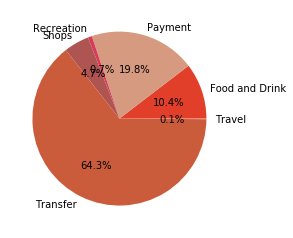

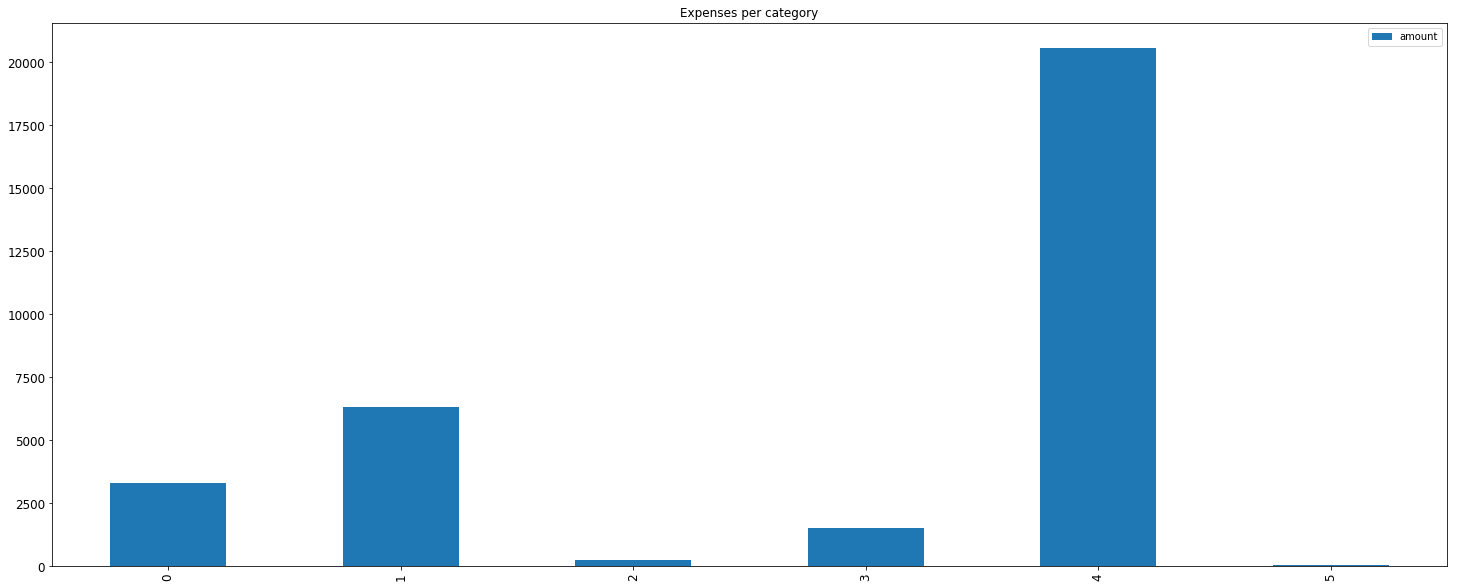

In [357]:
# Visualizations of data

# Pie chart of Spending categories
plt.pie(new_category_df['amount'], labels=new_category_df['category'], colors = colors, shadow = False, autopct='%1.1f%%')
plt.tight_layout
fig.set_size_inches(10, 30)
plt.savefig('Images/spending_per_category_piechart.png')

# # Bar chart of Transactions per category
new_category_df[['category','amount']].plot(kind='bar', title ="Expenses per category", 
                                              figsize=(25, 10), legend=True, fontsize=12)
# new_category_df.head()
plt.savefig('Images/spending_per_category_bar.png')
print(tabulate(new_category_df, headers='keys', tablefmt='psql', showindex=True))

### Calculate the expenses per month

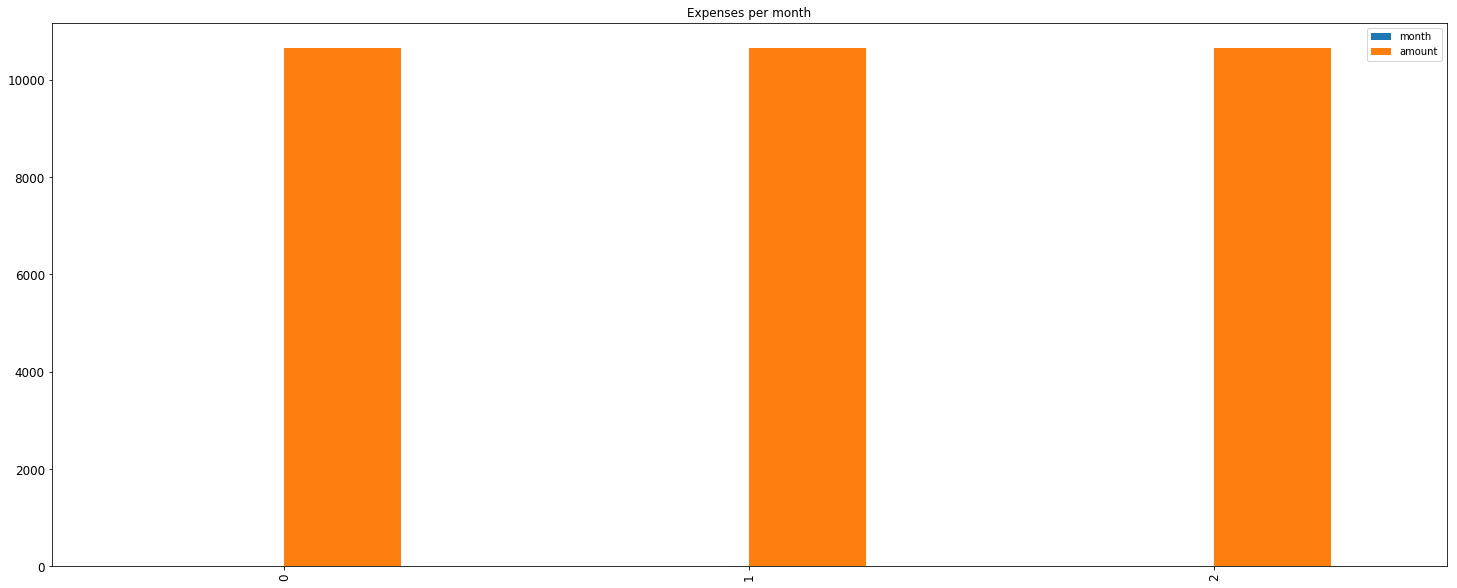

In [350]:
# YOUR CODE HERE
# Expenses per month
# new_month_df = new_df.drop(columns=['name', 'category', 'year'])
new_month_df.head()

new_month_df = new_month_df.groupby(['month']).sum()
new_month_df.head()

# Resetting the index to plot
new_month_df.reset_index(inplace = True)
new_month_df.head()

# Plot of expenses per month
new_month_df[['month','amount']].plot(kind='bar', title ="Expenses per month", figsize=(25, 10), legend=True, fontsize=12)
plt.savefig('Images/expenses_per_month_bar.png')

In [351]:
new_month_df.head()

,month,amount
0,7,10645.24
1,8,10645.24
2,9,10645.24


In [352]:
from tabulate import tabulate

In [354]:
print(tabulate(new_month_df, headers='keys', tablefmt='psql', showindex=True))

+----+---------+----------+
|    |   month |   amount |
|----+---------+----------|
|  0 |       7 |  10645.2 |
|  1 |       8 |  10645.2 |
|  2 |       9 |  10645.2 |
+----+---------+----------+


In [356]:
new_month_df.to_html('Images/expenses_per_month.html')